In [1]:
# Find RL_Note path and append sys path
import os, sys
cwd = os.getcwd()
dir_name = 'RL_Note'
pos = cwd.find(dir_name)
root_path = cwd[0:pos] + dir_name
sys.path.append(root_path)
print(root_path)
workspace_path = root_path + "\\pys"

e:\MyNote\MachineLearning\RL_Note


In [2]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten
from pys.utils.memory import ReplayMemory
from pys.utils.prioritized_memory import ProportionalPrioritizedMemory

In [3]:
env = gym.make("CartPole-v1")
state = env.reset()

(400, 600, 3)


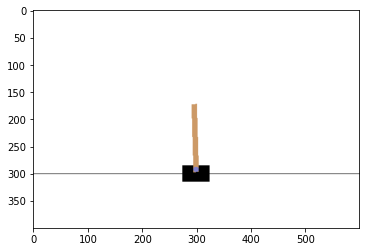

In [4]:
# Get original Image
img =  env.render(mode='rgb_array')
plt.imshow(img)
print(np.shape(img))

(160, 240, 3)


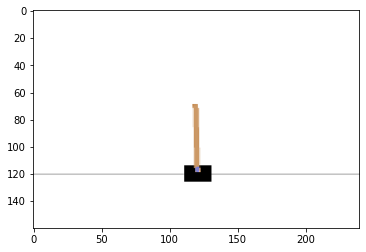

In [14]:
# Resize Image
img_rgb =  env.render(mode='rgb_array')
img_rgb_resize = cv2.resize(img_rgb, (240, 160), interpolation=cv2.INTER_CUBIC)
plt.imshow(img_rgb_resize)
print(np.shape(img_rgb_resize))

(160, 240, 3)


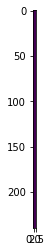

In [15]:
# Resize and Cut
img_rgb =  env.render(mode='rgb_array')
img_rgb_resize = cv2.resize(img_rgb, (240, 160), interpolation=cv2.INTER_CUBIC)
img_rgb_resize[img_rgb_resize < 255] = 0
plt.imshow(img_rgb_resize[2])
print(np.shape(img_rgb_resize))

In [13]:
#
# Resize and Cut
img_rgb =  env.render(mode='rgb_array')
img_rgb_resize = cv2.resize(img_rgb, (240, 160), interpolation=cv2.INTER_CUBIC)
img_k_resize = cv2.cvtColor(img_rgb_resize,cv2.COLOR_RGB2GRAY)
# img_rgb_resize[img_rgb_resize > 255] = 0
# img_rgb_resize = img_rgb_resize.transpose()
# img_rgb_extract= img_rgb_resize.sum(axis=0)
# img_rgb_extract= img_rgb_extract.transpose()
# img_rgb_extract= img_rgb_resize.sum(axis=2)
print('shape of img_k_resize : ',np.shape(img_k_resize))
print('minmax : ',img_k_resize.min(), img_k_resize.max())
print(img_rgb_extract[0][0])
print('shape of img_rgb_extract : ',np.shape(img_rgb_extract))
plt.imshow(img_k_resize)
print('sape of img_rgb_resize : ',np.shape(img_rgb_resize))
print(img_rgb_resize[0].max())
print(img_rgb_resize[1].sum())
print(img_rgb_resize[2].sum())

shape of img_k_resize :  (160, 240)
minmax :  0 255


NameError: name 'img_rgb_extract' is not defined

(400, 600, 3)
(100, 600, 3)
(96, 128)


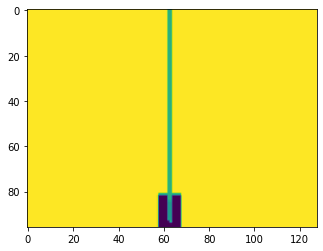

In [17]:
img_size = (128,96)
env = gym.make("CartPole-v1")
state = env.reset()
def get_image(img_rgb):
    # print(np.shape(img_rgb))
    # img_rgb = img_rgb[200:300,:]
    # print(np.shape(img_rgb))
    img_rgb_resize = cv2.resize(img_rgb, (img_size[0],img_size[1]), interpolation=cv2.INTER_CUBIC)
    img_k_resize = cv2.cvtColor(img_rgb_resize,cv2.COLOR_RGB2GRAY)
    # img_k_resize = img_k_resize / 255.0 # scaling 0 ~ 1
    img_k_resize = img_k_resize / 127.5 - 1. # scaling -1 ~ 1
    state = img_k_resize
    return state
state = get_image(env.render(mode='rgb_array'))
print(np.shape(state))
plt.imshow(state)

In [ ]:
import random
img_size = (128,96)
def get_image(img_rgb):
    img_rgb_resize = cv2.resize(img_rgb, (img_size[0],img_size[1]), interpolation=cv2.INTER_CUBIC)
    img_k_resize = cv2.cvtColor(img_rgb_resize,cv2.COLOR_RGB2GRAY)
    # img_k_resize = img_k_resize / 255.0
    state = img_k_resize
    return state
env.reset()
for i in range(10):
    state = get_image(env.render(mode='rgb_array'))
    state = np.expand_dims(state,axis=2)
    cv2.imwrite("cartpole_img\\cartpole_img{:05d}.jpg".format(i),state)
    next_state, reward, done, info = env.step(random.randrange(env.action_space.n))
    if done == True:
        env.reset()

(98, 128)
min :  0.0
max :  1.0


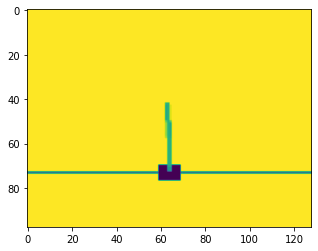

In [5]:
# Resize and Cut
img_size = (128,98)
def get_image(img_rgb):
    img_rgb_resize = cv2.resize(img_rgb, (img_size[0],img_size[1]), interpolation=cv2.INTER_CUBIC)
    img_k_resize = cv2.cvtColor(img_rgb_resize,cv2.COLOR_RGB2GRAY)
    img_k_resize = img_k_resize / 255.0
    state = img_k_resize
    return state
img =  get_image(env.render(mode='rgb_array'))
plt.imshow(img)
print(np.shape(img))
print('min : ', img.min())
print('max : ', img.max())

In [ ]:
import numpy as np
import random

class ReplayMemory():
    def __init__(self, capacity):
        # Basic member
        self.buffer = []
        self.buffer_idx = 0
        self.capacity = capacity

    def append(self, transition:list):
        '''
        >>> HOW TO USE
        transition = (state, action, reward, next_state, done)
        ReplayMemory.append(transition)
        '''
        self.buffer_idx = self.buffer_idx % self.capacity
        if(len(self.buffer) < self.capacity):
            self.buffer += [transition]
        else:
            self.buffer[self.buffer_idx] = transition
        self.buffer_idx += 1

    def sample(self, n:int):
        '''
        >>> HOW TO USE
        mini_batch = ReplayMemory.sample(number_of_samples)

        # Sampling from the memory
        states      = np.array([sample[0] for sample in mini_batch])
        actions     = np.array([sample[1] for sample in mini_batch])
        rewards     = np.array([sample[2] for sample in mini_batch])
        next_states = np.array([sample[3] for sample in mini_batch])
        dones       = np.array([sample[4] for sample in mini_batch])
        '''
        return random.sample(self.buffer,n)

    def __len__(self):
        return len(self.buffer)

    def show(self):
        print(self.buffer)

memory = ReplayMemory(capacity=1000)
for i in range(10):
    data = ((i,i+1), (np.power(i,2), np.power(i,3)))
    memory.append(data)
# print(memory.buffer)
idxs = [sample[0] for sample in memory.buffer]
print(idxs)

In [18]:
from tensorflow_addons.layers import MaxUnpooling2D
from tensorflow.keras.layers import UpSampling2D

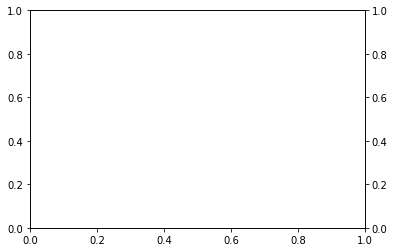

In [19]:
import matplotlib.pyplot as plt
import numpy as np
line = range(0,10)
power2 = np.power(line,2)
power3 = np.power(line,3)
fig = plt.figure(1)
ax1 = plt.subplot()
ax2 = plt.twinx()

(400, 600, 3)
(90, 120, 1)
(90, 120, 2)


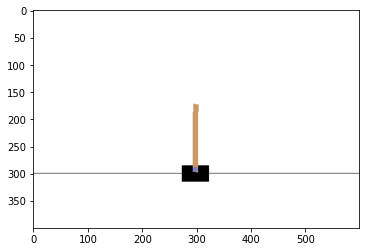

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import cv2
img_data_type = np.uint8
img_size = (120,90)
def _preprocessing_img(raw_img):
    # img_rbg_crop = raw_img[160:320,:,:]
    img_rgb_resize = cv2.resize(raw_img, img_size[0:2], interpolation=cv2.INTER_CUBIC)
    img_k_resize = cv2.cvtColor(img_rgb_resize,cv2.COLOR_RGB2GRAY)
    img_k_resize = img_k_resize / 255.0 # scaling 0 ~ 1
    # img_k_resize = img_k_resize / 127.5 - 1. # scaling -1 ~ 1
    preprocessed_state = np.array(img_k_resize,dtype=img_data_type)
    preprocessed_state = np.expand_dims(preprocessed_state,axis=2)
    return preprocessed_state
env = gym.make("CartPole-v1")
state = env.reset()
# Get original Image
img =  env.render(mode='rgb_array')
plt.imshow(img)
img_gray = _preprocessing_img(img)
print(np.shape(img))
print(np.shape(img_gray))
test = img_gray
test = np.append(test,img_gray,axis=2)
print(np.shape(test))


In [8]:
import numpy as np
img = np.array([[1,2],[4,5]],dtype=np.uint8)
img = np.expand_dims(img,axis=2)
test = img; print('test : ',np.shape(test))
test = np.append(test,img,axis=2); print('test : ',np.shape(test)); img += 1
test = np.append(test,img,axis=2); print('test : ',np.shape(test)); img += 1
test = np.append(test,img,axis=2); print('test : ',np.shape(test)); img += 1
print('test ',test)
test = np.delete(test,obj=0,axis=2); print('test : ',np.shape(test))
print('test ',test)


test :  (2, 2, 1)
test :  (2, 2, 2)
test :  (2, 2, 3)
test :  (2, 2, 4)
test  [[[1 1 1 1]
  [2 2 2 2]]

 [[4 4 4 4]
  [5 5 5 5]]]
test :  (2, 2, 3)
test  [[[1 1 1]
  [2 2 2]]

 [[4 4 4]
  [5 5 5]]]
